# Emotion Detection

Tester: Muhammad Aditya Bayhaqie

[Reference](https://paperswithcode.com/paper/facial-emotion-recognition-using-transfer)

## Library Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os

## Connect with Drive Data

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Import Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/CollabData/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download challenges-in-representation-learning-facial-expression-recognition-challenge

In [8]:
!unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


## Dataset Assesment

In [9]:
data = pd.read_csv('icml_face_data.csv')

In [10]:
data.shape

(35887, 3)

In [11]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


### Image Test

In [12]:
np_data = np.array(data)

In [13]:
np_data.shape

(35887, 3)

In [14]:
np_data[0]

array([0, 'Training',
       '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200

In [15]:
test_image = np_data[0][2].split()
print(type(test_image))
print(len(test_image))

<class 'list'>
2304


In [16]:
test_image = np.array(test_image).reshape(48, 48)
test_image.shape

(48, 48)

In [17]:
test_image = test_image.astype('float')

In [18]:
test_image

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

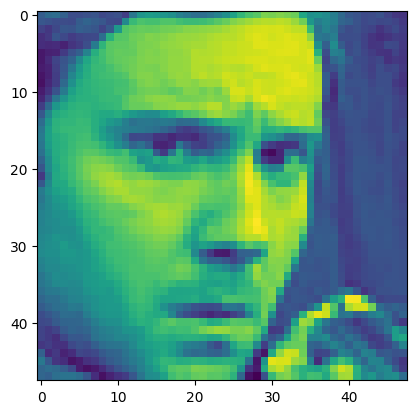

In [19]:
plt.imshow(test_image)

## Data Preparation

In [20]:
import os
import numpy as np
from PIL import Image

for i in range(len(data)):
    directory = 'data/' + np_data[i][1] + '/' + str(np_data[i][0])
    os.makedirs(directory, exist_ok=True)

    test_image = np_data[i][2].split(" ")
    test_image = np.array(test_image).reshape(48, 48)
    test_image = test_image.astype('float')

    # Use Pillow to save as JPG
    image = Image.fromarray(test_image.astype(np.uint8))
    image.save(directory + '/' + str(i) + '.jpg')

In [21]:
!ls data/

PrivateTest  PublicTest  Training


In [22]:
!ls data/Training

0  1  2  3  4  5  6


## Training with CNN

In [23]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import losses, optimizers, metrics

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'data/Training'
validation_dir = 'data/PublicTest'
test_dir ='data/PrivateTest'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48, 48),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (48, 48),
    batch_size=32
)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,639 (2.22 MB)

 Trainable params: 581,639 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 900,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=115
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
898/900 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3085 - loss: 1.7207

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


900/900 ━━━━━━━━━━━━━━━━━━━━ 109s 120ms/step - accuracy: 0.3087 - loss: 1.7205 - val_accuracy: 0.4472 - val_loss: 1.4497
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.4870 - loss: 1.3528 - val_accuracy: 0.4862 - val_loss: 1.3360
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 103s 114ms/step - accuracy: 0.5406 - loss: 1.2116 - val_accuracy: 0.5447 - val_loss: 1.2230
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 105s 116ms/step - accuracy: 0.5932 - loss: 1.0901 - val_accuracy: 0.5483 - val_loss: 1.2236
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 144s 118ms/step - accuracy: 0.6403 - loss: 0.9646 - val_accuracy: 0.5539 - val_loss: 1.2416
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 103s 115ms/step - accuracy: 0.6924 - loss: 0.8456 - val_accuracy: 0.5600 - val_loss: 1.2620
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 106s 117ms/step - accuracy: 0.7519 - loss: 0.6980 - val_accuracy: 0.5514 - val_loss: 1.4200
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 103s 114ms/step - accuracy: 0.7979 - loss: 0.57

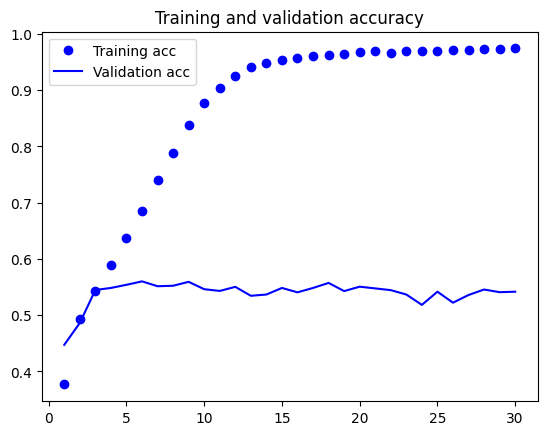

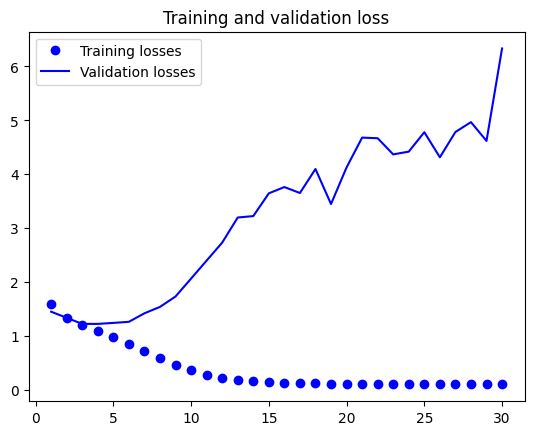

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Pre-Trained Model Support

In [28]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(48, 48, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,935 (57.15 MB)

 Trainable params: 14,980,935 (57.15 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=900,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=115)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 882s 978ms/step - categorical_accuracy: 0.3111 - loss: 1.7125 - val_categorical_accuracy: 0.3795 - val_loss: 1.6022
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 821s 912ms/step - categorical_accuracy: 0.3832 - loss: 1.5930 - val_categorical_accuracy: 0.3929 - val_loss: 1.5714
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 874s 971ms/step - categorical_accuracy: 0.3980 - loss: 1.5602 - val_categorical_accuracy: 0.3957 - val_loss: 1.5595
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 923s 973ms/step - categorical_accuracy: 0.4088 - loss: 1.5336 - val_categorical_accuracy: 0.4023 - val_loss: 1.5445
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 874s 971ms/step - categorical_accuracy: 0.4189 - loss: 1.5171 - val_categorical_accuracy: 0.4113 - val_loss: 1.5370
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 874s 918ms/step - categorical_accuracy: 0.4260 - loss: 1.5015 - val_categorical_accuracy: 0.4096 - val_loss

In [31]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=900,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=115)

Epoch 1/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1210s 1s/step - categorical_accuracy: 0.3802 - loss: 1.6101 - val_categorical_accuracy: 0.4366 - val_loss: 1.4165
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1255s 1s/step - categorical_accuracy: 0.5001 - loss: 1.3147 - val_categorical_accuracy: 0.5015 - val_loss: 1.3325
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1196s 1s/step - categorical_accuracy: 0.5626 - loss: 1.1672 - val_categorical_accuracy: 0.5308 - val_loss: 1.2461
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1224s 1s/step - categorical_accuracy: 0.6119 - loss: 1.0461 - val_categorical_accuracy: 0.5450 - val_loss: 1.2621
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1249s 1s/step - categorical_accuracy: 0.6542 - loss: 0.9241 - val_categorical_accuracy: 0.5358 - val_loss: 1.3869
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1232s 1s/step - categorical_accuracy: 0.7138 - loss: 0.7948 - val_categorical_accuracy: 0.5046 - val_loss: 1.5186
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 1229s 1s/step - categorical_accuracy

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('finetuning_on_pretrained_vgg16.h5')